In [23]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
from operator import itemgetter
from nltk.tokenize import TweetTokenizer
from pprint import pprint

In [24]:
import re
 
emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""
 
regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
 
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]
    
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)
 
def tokenize(s):
    return tokens_re.findall(s)
 
def preprocess(s, lowercase=True):
    tknzr = TweetTokenizer()
    ttokens = tknzr.tokenize(s)
    
    tokens = tokenize(" ".join(ttokens))
    if lowercase:
        #tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
        tokens = [token.lower() for token in tokens if token.isalpha()]
        tokens = set(tokens)
    return list(tokens)
 
tweet = 'RT  Example @marcobonzanini: just an example! :D http://example.com #NLP\u2025'
print(preprocess(tweet))
# ['RT', '@marcobonzanini', ':', 'just', 'an', 'example', '!', ':D', 'http://exampl

[u'rt', u'example', u'just', u'an']


In [25]:
stoplist = set([line.replace("\n","") for line in open('/Users/alinamazi/Data/stopword-list2.txt')])
pun = [',', '-','.', ':', '(', ')', '--', ';', '...', '?','today','follow','stats','can', 'say', 'says', 'will','may', 'must', 'us', 'via','a','the', 'rt', 'gg', 'gt', 'lt', 'la', 'de', 'te', 'lol', 'follow', 'followers', 'unfollow', 'unfollowers', 'unfollower', 'follower']

with open('/Users/alinamazi/Data/common_list.txt','rt') as myfile:
    common_word = myfile.read().splitlines()


In [27]:
f = open("/Users/alinamazi/Data/results/April/Exp1/aa.txt")
#f = open("/Users/alinamazi/Data/results/04_11_14/Exp1/ua_new.txt")


#search_word = 'south'
tweets_data = []
com = defaultdict(lambda : defaultdict(int))
count_search = Counter()
tweet_tokens = []
ngrams_tokens = []

for line in f:
    tweets_data.append(line.replace("\n", ""))

    terms_only = [term for term in preprocess(line) 
                      if term not in stoplist and term not in common_word and term not in pun
                      and not term.startswith(('#', '@')) and 'http' not in term]
    
    terms_ngrams = [term for term in preprocess(line) 
                      if term not in pun
                      and 'http' not in term]
                
                #if count < 20: 
                #    print tweet['text']
                #    print terms_only
    tweet_tokens += terms_only
    ngrams_tokens += terms_ngrams
                
    for i in range(len(terms_only)-1):            
        #for j in range(i+1, len(terms_only)):
        for j in range(len(terms_only)-1):
            w1, w2 = sorted([terms_only[i], terms_only[j]])                
            if w1 != w2:
                com[w1][w2] += 1

#    if search_word in terms_only:
#        count_search.update(terms_only)


In [28]:
len(tweet_tokens)

8543

In [57]:
len(ngrams_tokens)

135184

## Using NLTK Bigrams and FreqDist to show most common frequent words

In [47]:
## Using NLTK Bigrams to show most common frequent words
from nltk import bigrams,trigrams, ngrams
from nltk.probability import *

n = 2
ngrams_tokens = tweet_tokens
terms_bigram = ngrams(ngrams_tokens, n)
terms_bigram

%matplotlib inline
pairs = [ " ".join(pair) for pair in terms_bigram]
#frequent bigrams
fdist = FreqDist(pairs)
bigr = fdist.keys()
fifty_popular_bigr = fdist.most_common(20)
print fifty_popular_bigr
#fdist.plot(5)
#pairs

[(u'flight unconscious', 34), (u'crew landed', 34), (u'lip grateful', 34), (u'grateful bloody', 34), (u'bloody safely', 34), (u'landed lip', 34), (u'dc crew', 34), (u'giving knocking', 34), (u'knocking dc', 34), (u'unconscious giving', 34), (u'just violently', 29), (u'hitting attendant', 29), (u'took hitting', 29), (u'flt took', 28), (u'attendant terrible', 28), (u'violently flt', 28), (u'woman just', 28), (u'terrible stroller', 28), (u'aa woman', 28), (u'airlines american', 27)]


In [48]:
fifty_popular_bigr

[(u'flight unconscious', 34),
 (u'crew landed', 34),
 (u'lip grateful', 34),
 (u'grateful bloody', 34),
 (u'bloody safely', 34),
 (u'landed lip', 34),
 (u'dc crew', 34),
 (u'giving knocking', 34),
 (u'knocking dc', 34),
 (u'unconscious giving', 34),
 (u'just violently', 29),
 (u'hitting attendant', 29),
 (u'took hitting', 29),
 (u'flt took', 28),
 (u'attendant terrible', 28),
 (u'violently flt', 28),
 (u'woman just', 28),
 (u'terrible stroller', 28),
 (u'aa woman', 28),
 (u'airlines american', 27)]

### Plot the results using Pandas Plotting
**Bigrams
*Trigrams
*Ngrams

In [49]:
pd_common = pd.DataFrame()
pd_common['count']=map(lambda bi:bi[1], fifty_popular_bigr)
pd_common['bigram']=map(lambda bi:bi[0], fifty_popular_bigr)

In [50]:
pd_common

,count,bigram
0,34,flight unconscious
1,34,crew landed
2,34,lip grateful
3,34,grateful bloody
4,34,bloody safely
5,34,landed lip
6,34,dc crew
7,34,giving knocking
8,34,knocking dc
9,34,unconscious giving


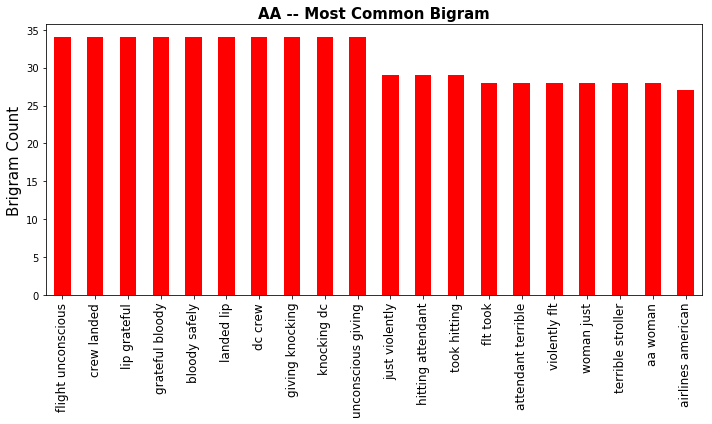

In [51]:
fig, ax = plt.subplots(figsize=(10,6))
#ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_title('AA -- Most Common Bigram', fontsize=15, fontweight='bold')
ax.set_ylabel('Brigram Count' , fontsize=15)

pd_common['count'].plot(ax=ax, kind='bar', color='red')
ax.set_xticklabels(pd_common['bigram'], fontsize=12)
plt.tight_layout()
plt.savefig('../TDI/bigrams_aa.png')

[(u'crew landed lip', 34), (u'knocking dc crew', 34), (u'dc crew landed', 34), (u'landed lip grateful', 34), (u'giving knocking dc', 34), (u'unconscious giving knocking', 34), (u'flight unconscious giving', 34), (u'lip grateful bloody', 34), (u'grateful bloody safely', 34), (u'took hitting attendant', 29), (u'attendant terrible stroller', 28), (u'aa woman just', 28), (u'woman just violently', 28), (u'flt took hitting', 28), (u'hitting attendant terrible', 28), (u'just violently flt', 28), (u'violently flt took', 28), (u'safely flight unconscious', 14), (u'bloody safely flight', 14), (u'goes service reputation', 13)]


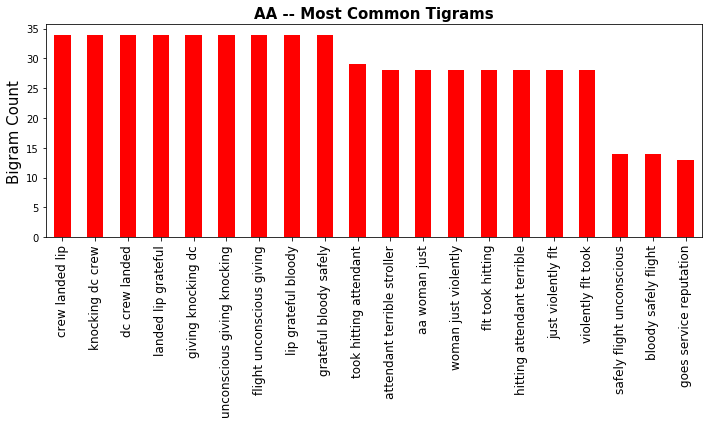

In [43]:
n = 3
terms_bigram = ngrams(ngrams_tokens, n)
terms_bigram

%matplotlib inline
pairs = [ " ".join(pair) for pair in terms_bigram]
#frequent bigrams
fdist = FreqDist(pairs)
bigr = fdist.keys()
fifty_popular_bigr = fdist.most_common(20)
print fifty_popular_bigr

pd_common['count']=map(lambda bi:bi[1], fifty_popular_bigr)
pd_common['bigram']=map(lambda bi:bi[0], fifty_popular_bigr)

fig, ax = plt.subplots(figsize=(10,6))
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_ylabel('Bigram Count' , fontsize=15)
ax.set_title('AA -- Most Common Tigrams', fontsize=15, fontweight='bold')

pd_common['count'].plot(ax=ax, kind='bar', color='red')
ax.set_xticklabels(pd_common['bigram'],fontsize=12)

plt.tight_layout()
plt.savefig('../TDI/trigrams_aa.png')

[(u'giving knocking dc crew', 34), (u'unconscious giving knocking dc', 34), (u'knocking dc crew landed', 34), (u'dc crew landed lip', 34), (u'crew landed lip grateful', 34), (u'flight unconscious giving knocking', 34), (u'lip grateful bloody safely', 34), (u'landed lip grateful bloody', 34), (u'violently flt took hitting', 28), (u'aa woman just violently', 28), (u'woman just violently flt', 28), (u'flt took hitting attendant', 28), (u'hitting attendant terrible stroller', 28), (u'just violently flt took', 28), (u'took hitting attendant terrible', 28), (u'grateful bloody safely flight', 14), (u'bloody safely flight unconscious', 14), (u'safely flight unconscious giving', 14), (u'woman hit goes service', 13), (u'goes service reputation stroller', 13)]


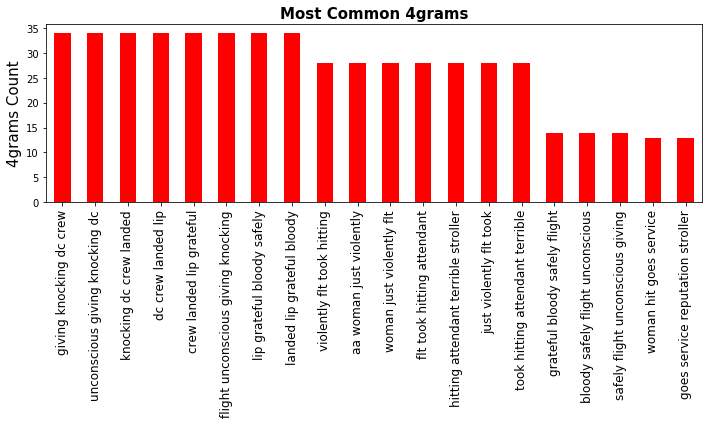

In [44]:
n = 4
terms_bigram = ngrams(ngrams_tokens, n)
terms_bigram

%matplotlib inline
pairs = [ " ".join(pair) for pair in terms_bigram]
#frequent bigrams
fdist = FreqDist(pairs)
bigr = fdist.keys()
fifty_popular_bigr = fdist.most_common(20)
print fifty_popular_bigr

pd_common['count']=map(lambda bi:bi[1], fifty_popular_bigr)
pd_common['bigram']=map(lambda bi:bi[0], fifty_popular_bigr)

fig, ax = plt.subplots(figsize=(10,6))
#ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_title('Most Common 4grams', fontsize=15, fontweight='bold')
ax.set_ylabel('4grams Count' , fontsize=15)

pd_common['count'].plot(ax=ax, kind='bar', color='red')
ax.set_xticklabels(pd_common['bigram'],fontsize=12)

plt.tight_layout()
plt.savefig('../TDI/ngrams_aa.png')


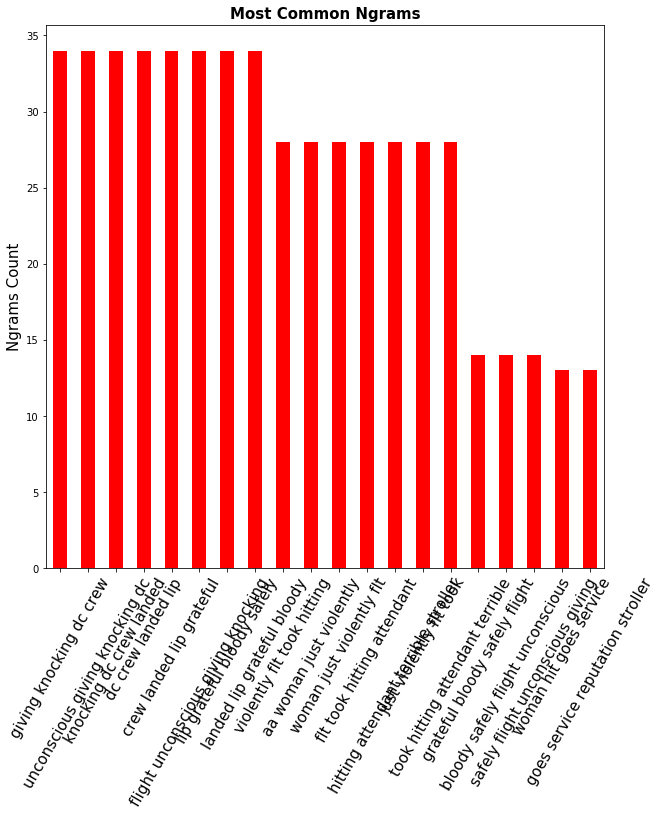

In [36]:
fig, ax = plt.subplots(figsize=(10,10))
#ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_title('Most Common Ngrams', fontsize=15, fontweight='bold')
ax.set_ylabel('Ngrams Count' , fontsize=15)

pd_common['count'].plot(ax=ax, kind='bar', color='red')
ax.set_xticklabels(pd_common['bigram'],rotation=60,fontsize=15)

In [135]:
fdist = FreqDist(tweet_tokens)
fdist.freq('officer')

0.06885544915640675

In [118]:
fdist

FreqDist()

In [134]:
l = fdist.max()
l

u'officer'

### Finding most common words of the cluster using FreqDist

In [37]:
#Making dictionary
words_only = [w for w in tweet_tokens if w.isalpha()]
dic = set([w.lower() for w in words_only])
word_count = len(dic)
print word_count

2682


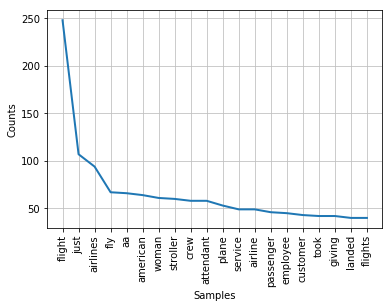

In [38]:
#Plot the frequencies
fdist = FreqDist(tweet_tokens)
fdist.plot(20) # Plots word + frequency
#fdist.plot(20,cumulative=True) # Plots word + cumulative freq.